In [97]:
import numpy as np

In [98]:
dateset = np.loadtxt('car.data',dtype=np.str_,delimiter=',')

In [99]:
dateset

array([['vhigh', 'vhigh', '2', ..., 'small', 'low', 'unacc'],
       ['vhigh', 'vhigh', '2', ..., 'small', 'med', 'unacc'],
       ['vhigh', 'vhigh', '2', ..., 'small', 'high', 'unacc'],
       ...,
       ['low', 'low', '5more', ..., 'big', 'low', 'unacc'],
       ['low', 'low', '5more', ..., 'big', 'med', 'good'],
       ['low', 'low', '5more', ..., 'big', 'high', 'vgood']], dtype='<U5')

In [100]:
from sklearn.preprocessing import LabelEncoder

In [101]:
le = LabelEncoder()

In [102]:
#取最后一列
res = le.fit_transform(dateset[:,-1])

In [103]:
def covert(col,value_name_list):
    le = LabelEncoder()
    res = le.fit_transform(col)
    value_name_list.append(le.classes_)
    return res

In [104]:
value_name_list = []

In [105]:
dataset=np.apply_along_axis(covert,axis=0,arr=dateset,value_name_list=value_name_list)#将函数应用到数组的每一行，apply_along_axis是对数组的操作，axis=0是对列操作，axis=1是对行操作

In [106]:
dataset

array([[3, 3, 0, ..., 2, 1, 2],
       [3, 3, 0, ..., 2, 2, 2],
       [3, 3, 0, ..., 2, 0, 2],
       ...,
       [1, 1, 3, ..., 0, 1, 2],
       [1, 1, 3, ..., 0, 2, 1],
       [1, 1, 3, ..., 0, 0, 3]], dtype=int64)

In [107]:
value_name_list#include 6 list

[array(['high', 'low', 'med', 'vhigh'], dtype='<U5'),
 array(['high', 'low', 'med', 'vhigh'], dtype='<U5'),
 array(['2', '3', '4', '5more'], dtype='<U5'),
 array(['2', '4', 'more'], dtype='<U5'),
 array(['big', 'med', 'small'], dtype='<U5'),
 array(['high', 'low', 'med'], dtype='<U5'),
 array(['acc', 'good', 'unacc', 'vgood'], dtype='<U5')]

In [108]:
X=dataset[:,:-1]

In [109]:
y=dataset[:,-1]

In [110]:
X

array([[3, 3, 0, 0, 2, 1],
       [3, 3, 0, 0, 2, 2],
       [3, 3, 0, 0, 2, 0],
       ...,
       [1, 1, 3, 2, 0, 1],
       [1, 1, 3, 2, 0, 2],
       [1, 1, 3, 2, 0, 0]], dtype=int64)

In [111]:
y

array([2, 2, 2, ..., 2, 1, 3], dtype=int64)

In [112]:
from sklearn.tree import DecisionTreeClassifier

clf=DecisionTreeClassifier(criterion='gini',max_depth=6)

In [113]:
from sklearn.model_selection import train_test_split

In [114]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [115]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=6)

In [116]:
from sklearn import tree

[Text(0.521551724137931, 0.9285714285714286, 'x[3] <= 0.5\ngini = 0.457\nsamples = 1209\nvalue = [269, 44, 847, 49]'),
 Text(0.4870689655172414, 0.7857142857142857, 'gini = 0.0\nsamples = 400\nvalue = [0, 0, 400, 0]'),
 Text(0.5560344827586207, 0.7857142857142857, 'x[5] <= 0.5\ngini = 0.578\nsamples = 809\nvalue = [269, 44, 447, 49]'),
 Text(0.33620689655172414, 0.6428571428571429, 'x[0] <= 2.5\ngini = 0.629\nsamples = 270\nvalue = [145, 19, 57, 49]'),
 Text(0.1896551724137931, 0.5, 'x[0] <= 0.5\ngini = 0.614\nsamples = 196\nvalue = [108, 19, 20, 49]'),
 Text(0.10344827586206896, 0.35714285714285715, 'x[1] <= 2.5\ngini = 0.334\nsamples = 66\nvalue = [52, 0, 14, 0]'),
 Text(0.06896551724137931, 0.21428571428571427, 'x[2] <= 0.5\ngini = 0.071\nsamples = 54\nvalue = [52, 0, 2, 0]'),
 Text(0.034482758620689655, 0.07142857142857142, 'gini = 0.26\nsamples = 13\nvalue = [11, 0, 2, 0]'),
 Text(0.10344827586206896, 0.07142857142857142, 'gini = 0.0\nsamples = 41\nvalue = [41, 0, 0, 0]'),
 Text(0

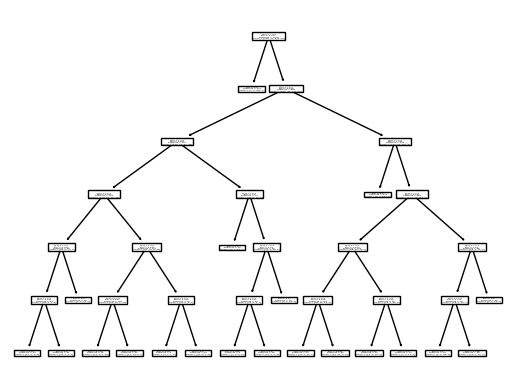

In [117]:
tree.plot_tree(clf)

In [118]:
from sklearn.tree import export_graphviz


In [119]:
dot_car=export_graphviz(clf,out_file=None,feature_names=["buying","maint","doors","persons","lug_boot","safety"],class_names=le.classes_,filled=True,rounded=True)

In [120]:
import graphviz
graph_car=graphviz.Source(dot_car)

In [121]:
#生成pdf

In [122]:
graph_car.render('car')

'car.pdf'

In [123]:
from sklearn.metrics import accuracy_score

In [124]:
y_pred=clf.predict(X_test)

In [125]:
y_pred

array([0, 0, 2, 2, 2, 3, 2, 0, 0, 0, 2, 2, 0, 2, 2, 0, 2, 2, 0, 0, 3, 0,
       0, 2, 2, 2, 2, 2, 2, 2, 3, 0, 2, 0, 0, 2, 0, 2, 2, 2, 0, 2, 0, 2,
       3, 2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 1, 0, 2, 2, 0, 0,
       2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0,
       2, 2, 2, 3, 0, 2, 2, 3, 2, 0, 0, 0, 2, 0, 1, 2, 3, 0, 2, 0, 2, 2,
       2, 2, 2, 0, 2, 3, 0, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 0, 0, 2, 2, 2,
       0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 0, 0, 0, 0, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 0, 3, 0, 2, 0, 2, 1, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 0,
       2, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 0, 2, 3, 2, 2, 2, 3, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 1, 2, 0, 2, 2, 2, 2, 2, 1, 1, 3, 1, 0, 2, 2, 2, 0, 2, 0, 3,
       2, 2, 3, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0,
       2, 3, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2,

In [126]:
y_pred_inverse=le.inverse_transform(y_pred)

In [127]:
y_pred_inverse

array(['acc', 'acc', 'unacc', 'unacc', 'unacc', 'vgood', 'unacc', 'acc',
       'acc', 'acc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'acc',
       'unacc', 'unacc', 'acc', 'acc', 'vgood', 'acc', 'acc', 'unacc',
       'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'vgood',
       'acc', 'unacc', 'acc', 'acc', 'unacc', 'acc', 'unacc', 'unacc',
       'unacc', 'acc', 'unacc', 'acc', 'unacc', 'vgood', 'unacc', 'acc',
       'acc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc',
       'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'good', 'acc', 'unacc',
       'unacc', 'acc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc',
       'acc', 'acc', 'acc', 'acc', 'acc', 'unacc', 'acc', 'acc', 'unacc',
       'acc', 'acc', 'acc', 'acc', 'unacc', 'unacc', 'unacc', 'acc',
       'unacc', 'unacc', 'unacc', 'vgood', 'acc', 'unacc', 'unacc',
       'vgood', 'unacc', 'acc', 'acc', 'acc', 'unacc', 'acc', 'good',
       'unacc', 'vgood', 'acc', 'unacc', 'acc', 'unacc', 'unacc', 

In [128]:
accuracy_score(y_test,y_pred)

0.8728323699421965